In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 df  = pd.read_csv(r"C:\Users\Asus\Downloads\reviews_data_dump\reviews_badminton\data.csv")

In [3]:
df

Reviewer Name               Review Title  \
0               Kamal Suresh               Nice product   
1          Flipkart Customer     Don't waste your money   
2     A. S. Raja Srinivasan   Did not meet expectations   
3        Suresh Narayanasamy                       Fair   
4                  ASHIK P A                Over priced   
...                      ...                        ...   
8513                     NaN                        NaN   
8514                     NaN                        NaN   
8515                     NaN                        NaN   
8516                     NaN                        NaN   
8517                     NaN                        NaN   

                  Place of Review  Up Votes  Down Votes     Month  \
0      Certified Buyer, Chirakkal     889.0        64.0  Feb 2021   
1      Certified Buyer, Hyderabad     109.0         6.0  Feb 2021   
2     Certified Buyer, Dharmapuri      42.0         3.0  Apr 2021   
3        Certified Buyer, Chennai      25.0         1.0       NaN   
4                             NaN     147.0        24.0  Apr 2016   
...                           ...       ...         ...       ...   
8513                          NaN       NaN         NaN       NaN   
8514                          NaN       NaN         NaN       NaN   
8515                          NaN       NaN         NaN       NaN   
8516                          NaN       NaN         NaN       NaN   
8517                          NaN       NaN         NaN       NaN   

                                            Review text  Ratings  
0     Nice product, good quality, but price is now r...        4  
1     They didn't supplied Yonex Mavis 350. Outside ...        1  
2     Worst product. Damaged shuttlecocks packed in ...        1  
3     Quite O. K. , but nowadays  the quality of the...        3  
4     Over pricedJust â?¹620 ..from retailer.I didn'...        1  
...                                                 ...      ...  
8513                                                NaN        5  
8514                                                NaN        2  
8515                                                NaN        4  
8516                                                NaN        1  
8517                                                NaN        4  

[8518 rows x 8 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [5]:
df.isna().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [6]:
df.dropna(subset = 'Reviewer Name',inplace =True)

In [7]:
df.isna().sum()

Reviewer Name        0
Review Title         0
Place of Review     40
Up Votes             0
Down Votes           0
Month              455
Review text          0
Ratings              0
dtype: int64

In [8]:
df['Ratings'].value_counts()

5    5078
4    1744
1     765
3     615
2     306
Name: Ratings, dtype: int64

In [9]:
def f(row):
    
    '''This function returns sentiment value based on the overall ratings from the user'''
    
    if row['Ratings'] == 3.0:
        val = 'Neutral'
    elif row['Ratings'] == 1.0 or row['Ratings'] == 2.0:
        val = 'Negative'
    elif row['Ratings'] == 4.0 or row['Ratings'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

In [10]:
df['Sentiment'] = df.apply(f,axis=1)

In [11]:
df['Ratings'].value_counts()

5    5078
4    1744
1     765
3     615
2     306
Name: Ratings, dtype: int64

In [12]:
df['Sentiment'].value_counts()

Positive    6822
Negative    1071
Neutral      615
Name: Sentiment, dtype: int64

In [13]:
df = df[[ 'Review text','Ratings','Sentiment']]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8508 entries, 0 to 8507
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review text  8508 non-null   object
 1   Ratings      8508 non-null   int64 
 2   Sentiment    8508 non-null   object
dtypes: int64(1), object(2)
memory usage: 265.9+ KB


In [15]:
df.dropna(inplace = True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_10788\1791587065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


In [16]:
df.isna().sum() 

Review text    0
Ratings        0
Sentiment      0
dtype: int64

In [17]:
df.describe(include='all')

Review text      Ratings Sentiment
count            8508  8508.000000      8508
unique           4981          NaN         3
top     GoodREAD MORE          NaN  Positive
freq              695          NaN      6822
mean              NaN     4.182887       NaN
std               NaN     1.260546       NaN
min               NaN     1.000000       NaN
25%               NaN     4.000000       NaN
50%               NaN     5.000000       NaN
75%               NaN     5.000000       NaN
max               NaN     5.000000       NaN

In [18]:
from textblob import TextBlob

In [19]:
df['polarity'] = df['Review text'].map(lambda text: TextBlob(text).sentiment.polarity)
df['review_len'] = df['Review text'].astype(str).apply(len)
df['word_count'] = df['Review text'].apply(lambda x: len(str(x).split()))

C:\Users\Asus\AppData\Local\Temp\ipykernel_10788\3924454404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'] = df['Review text'].map(lambda text: TextBlob(text).sentiment.polarity)
C:\Users\Asus\AppData\Local\Temp\ipykernel_10788\3924454404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_len'] = df['Review text'].astype(str).apply(len)
C:\Users\Asus\AppData\Local\Temp\ipykernel_10788\3924454404.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [20]:
df

Review text  Ratings Sentiment  \
0     Nice product, good quality, but price is now r...        4  Positive   
1     They didn't supplied Yonex Mavis 350. Outside ...        1  Negative   
2     Worst product. Damaged shuttlecocks packed in ...        1  Negative   
3     Quite O. K. , but nowadays  the quality of the...        3   Neutral   
4     Over pricedJust â?¹620 ..from retailer.I didn'...        1  Negative   
...                                                 ...      ...       ...   
8503  Wrost and duplicate productDon't buy this sell...        1  Negative   
8504        Received product intact and sealedREAD MORE        5  Positive   
8505  Delivered before time but price is high from m...        3   Neutral   
8506  up to the mark but same is available in market...        4  Positive   
8507                       Nice delivery speedREAD MORE        5  Positive   

      polarity  review_len  word_count  
0     0.214286         204          37  
1     0.000000         118          20  
2    -0.137784         157          24  
3     0.273571         388          81  
4     0.500000         114          17  
...        ...         ...         ...  
8503  0.500000         111          17  
8504  0.500000          43           6  
8505  0.330000          60          10  
8506  0.183333          70          14  
8507  0.550000          28           4  

[8508 rows x 6 columns]

In [21]:
df['Ratings'].value_counts()

5    5078
4    1744
1     765
3     615
2     306
Name: Ratings, dtype: int64

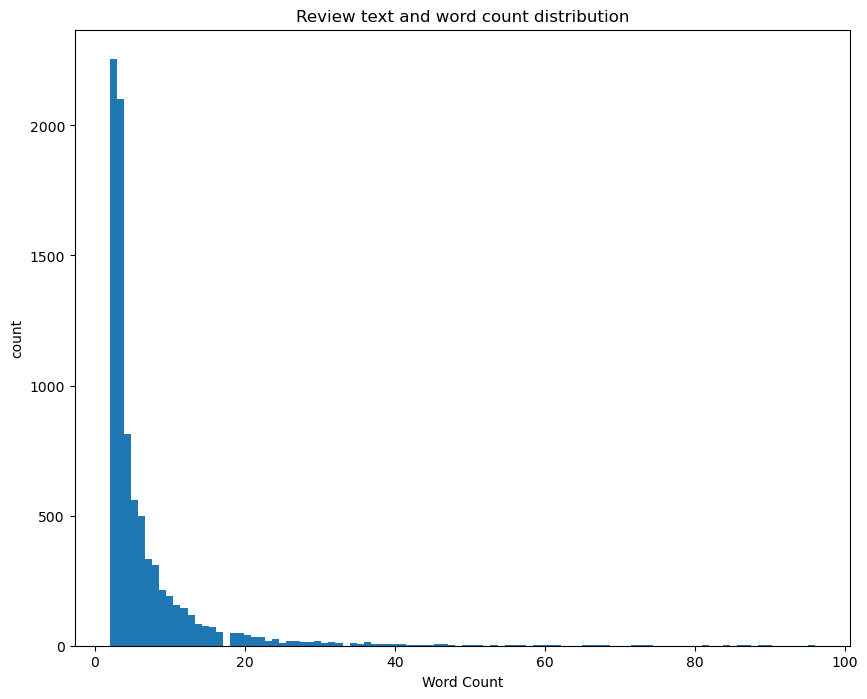

In [22]:
plt.figure(figsize=(10,8))
plt.hist(x=df['word_count'],bins=100)
plt.title('Review text and word count distribution')
plt.xlabel('Word Count')
plt.ylabel('count')
plt.show()

In [23]:
df

Review text  Ratings Sentiment  \
0     Nice product, good quality, but price is now r...        4  Positive   
1     They didn't supplied Yonex Mavis 350. Outside ...        1  Negative   
2     Worst product. Damaged shuttlecocks packed in ...        1  Negative   
3     Quite O. K. , but nowadays  the quality of the...        3   Neutral   
4     Over pricedJust â?¹620 ..from retailer.I didn'...        1  Negative   
...                                                 ...      ...       ...   
8503  Wrost and duplicate productDon't buy this sell...        1  Negative   
8504        Received product intact and sealedREAD MORE        5  Positive   
8505  Delivered before time but price is high from m...        3   Neutral   
8506  up to the mark but same is available in market...        4  Positive   
8507                       Nice delivery speedREAD MORE        5  Positive   

      polarity  review_len  word_count  
0     0.214286         204          37  
1     0.000000         118          20  
2    -0.137784         157          24  
3     0.273571         388          81  
4     0.500000         114          17  
...        ...         ...         ...  
8503  0.500000         111          17  
8504  0.500000          43           6  
8505  0.330000          60          10  
8506  0.183333          70          14  
8507  0.550000          28           4  

[8508 rows x 6 columns]

In [24]:
import regex as re
import  nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [25]:
stop_words = ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']
lem = WordNetLemmatizer()

In [26]:
remove_spl_cha = '[^a-zA-Z]'

In [27]:
def text_preprocessing(review):
    review = review.lower()
    review = re.sub(remove_spl_cha,' ',review)
    review = review.split()
    review = [lem.lemmatize(word) for word in review]
    review = [i for i in review if i not in stop_words]  
    return ' '.join(review)

In [28]:
df['Review text']=df['Review text'].apply(text_preprocessing)

C:\Users\Asus\AppData\Local\Temp\ipykernel_10788\3611889565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review text']=df['Review text'].apply(text_preprocessing)


In [29]:
df

Review text  Ratings Sentiment  \
0     nice product good quality but price rising bad...        4  Positive   
1     didn t supplied yonex mavis outside cover wa y...        1  Negative   
2     worst product damaged shuttlecock packed new b...        1  Negative   
3     quite o k but nowadays quality cork like not y...        3   Neutral   
4     pricedjust retailer didn t understand wat adva...        1  Negative   
...                                                 ...      ...       ...   
8503  wrost duplicate productdon t buy seller produc...        1  Negative   
8504                 received product intact sealedread        5  Positive   
8505           delivered time but price high marketread        3   Neutral   
8506            mark but available market le price read        4  Positive   
8507                            nice delivery speedread        5  Positive   

      polarity  review_len  word_count  
0     0.214286         204          37  
1     0.000000         118          20  
2    -0.137784         157          24  
3     0.273571         388          81  
4     0.500000         114          17  
...        ...         ...         ...  
8503  0.500000         111          17  
8504  0.500000          43           6  
8505  0.330000          60          10  
8506  0.183333          70          14  
8507  0.550000          28           4  

[8508 rows x 6 columns]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
from wordcloud import WordCloud

In [32]:
negative_df = df.loc[df['Sentiment']=='Negative', :]
words = ' '.join(negative_df['Review text'])
cleaned_word = " ".join([word for word in words.split() 
                        if 'subject' not in word])

In [33]:
negative_wordcloud = WordCloud(background_color='white',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

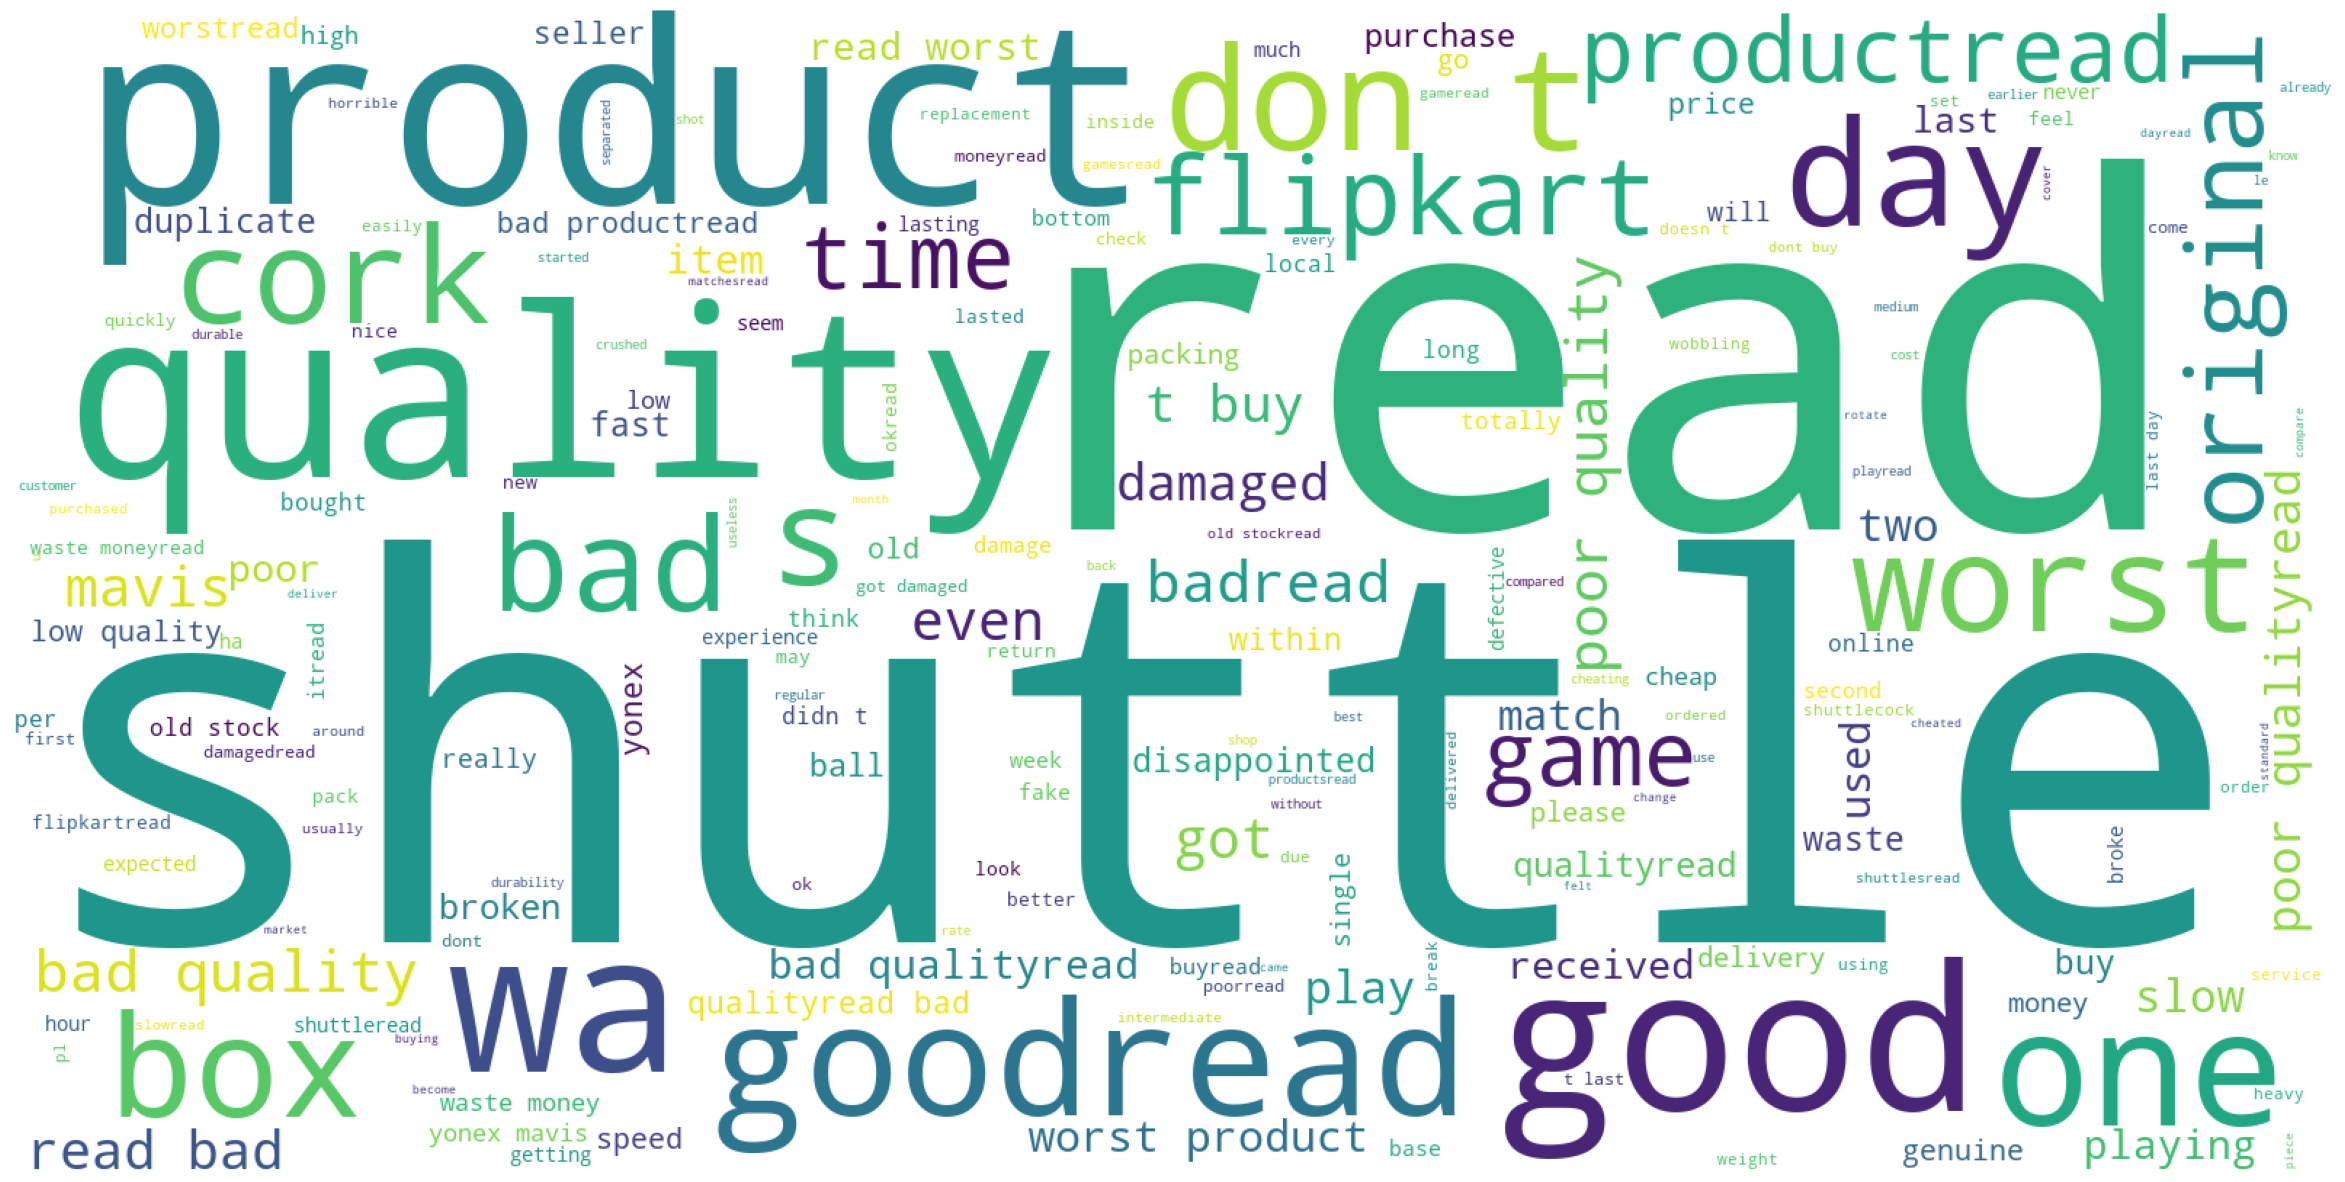

In [34]:
plt.figure(1,figsize=(30,20))
plt.imshow(negative_wordcloud)
plt.axis('off')
plt.show()

In [35]:
positive_df = df.loc[df['Sentiment']=='Positive', :]
words = ' '.join(positive_df['Review text'])
cleaned_word = " ".join([word for word in words.split() 
                        if 'subject' not in word])

In [36]:
positive_wordcloud = WordCloud(background_color='white',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

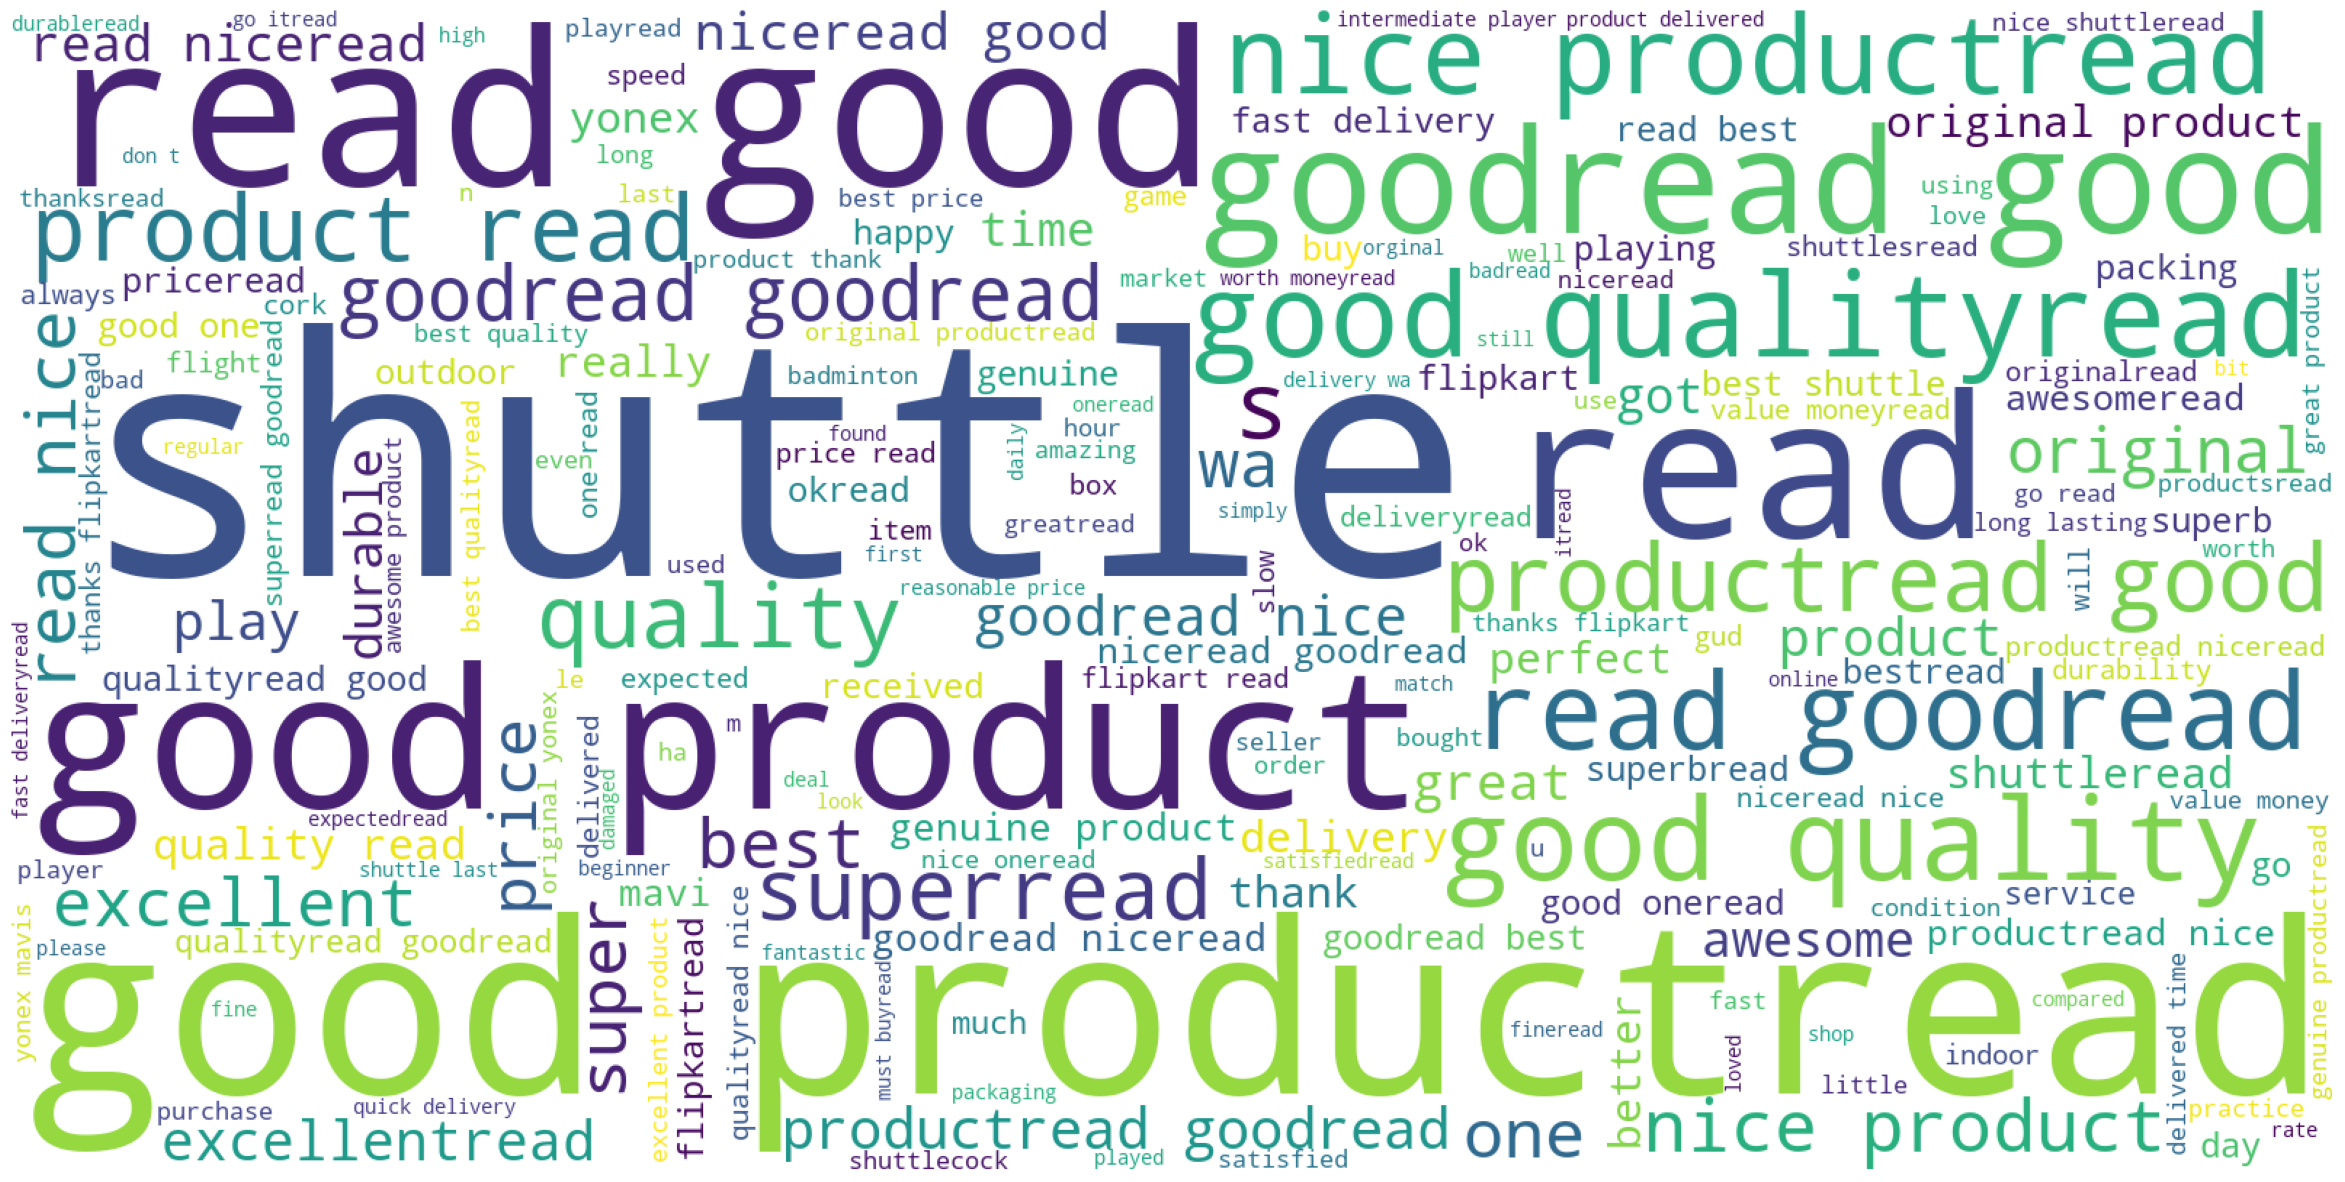

In [37]:
plt.figure(1,figsize=(30,20))
plt.imshow(positive_wordcloud)
plt.axis('off')
plt.show()

In [38]:
neutral_df = df.loc[df['Sentiment']=='Neutral', :]
words = ' '.join(positive_df['Review text'])
cleaned_word = " ".join([word for word in words.split() 
                        if 'subject' not in word])

In [39]:
neutral_wordcloud = WordCloud(background_color='white',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

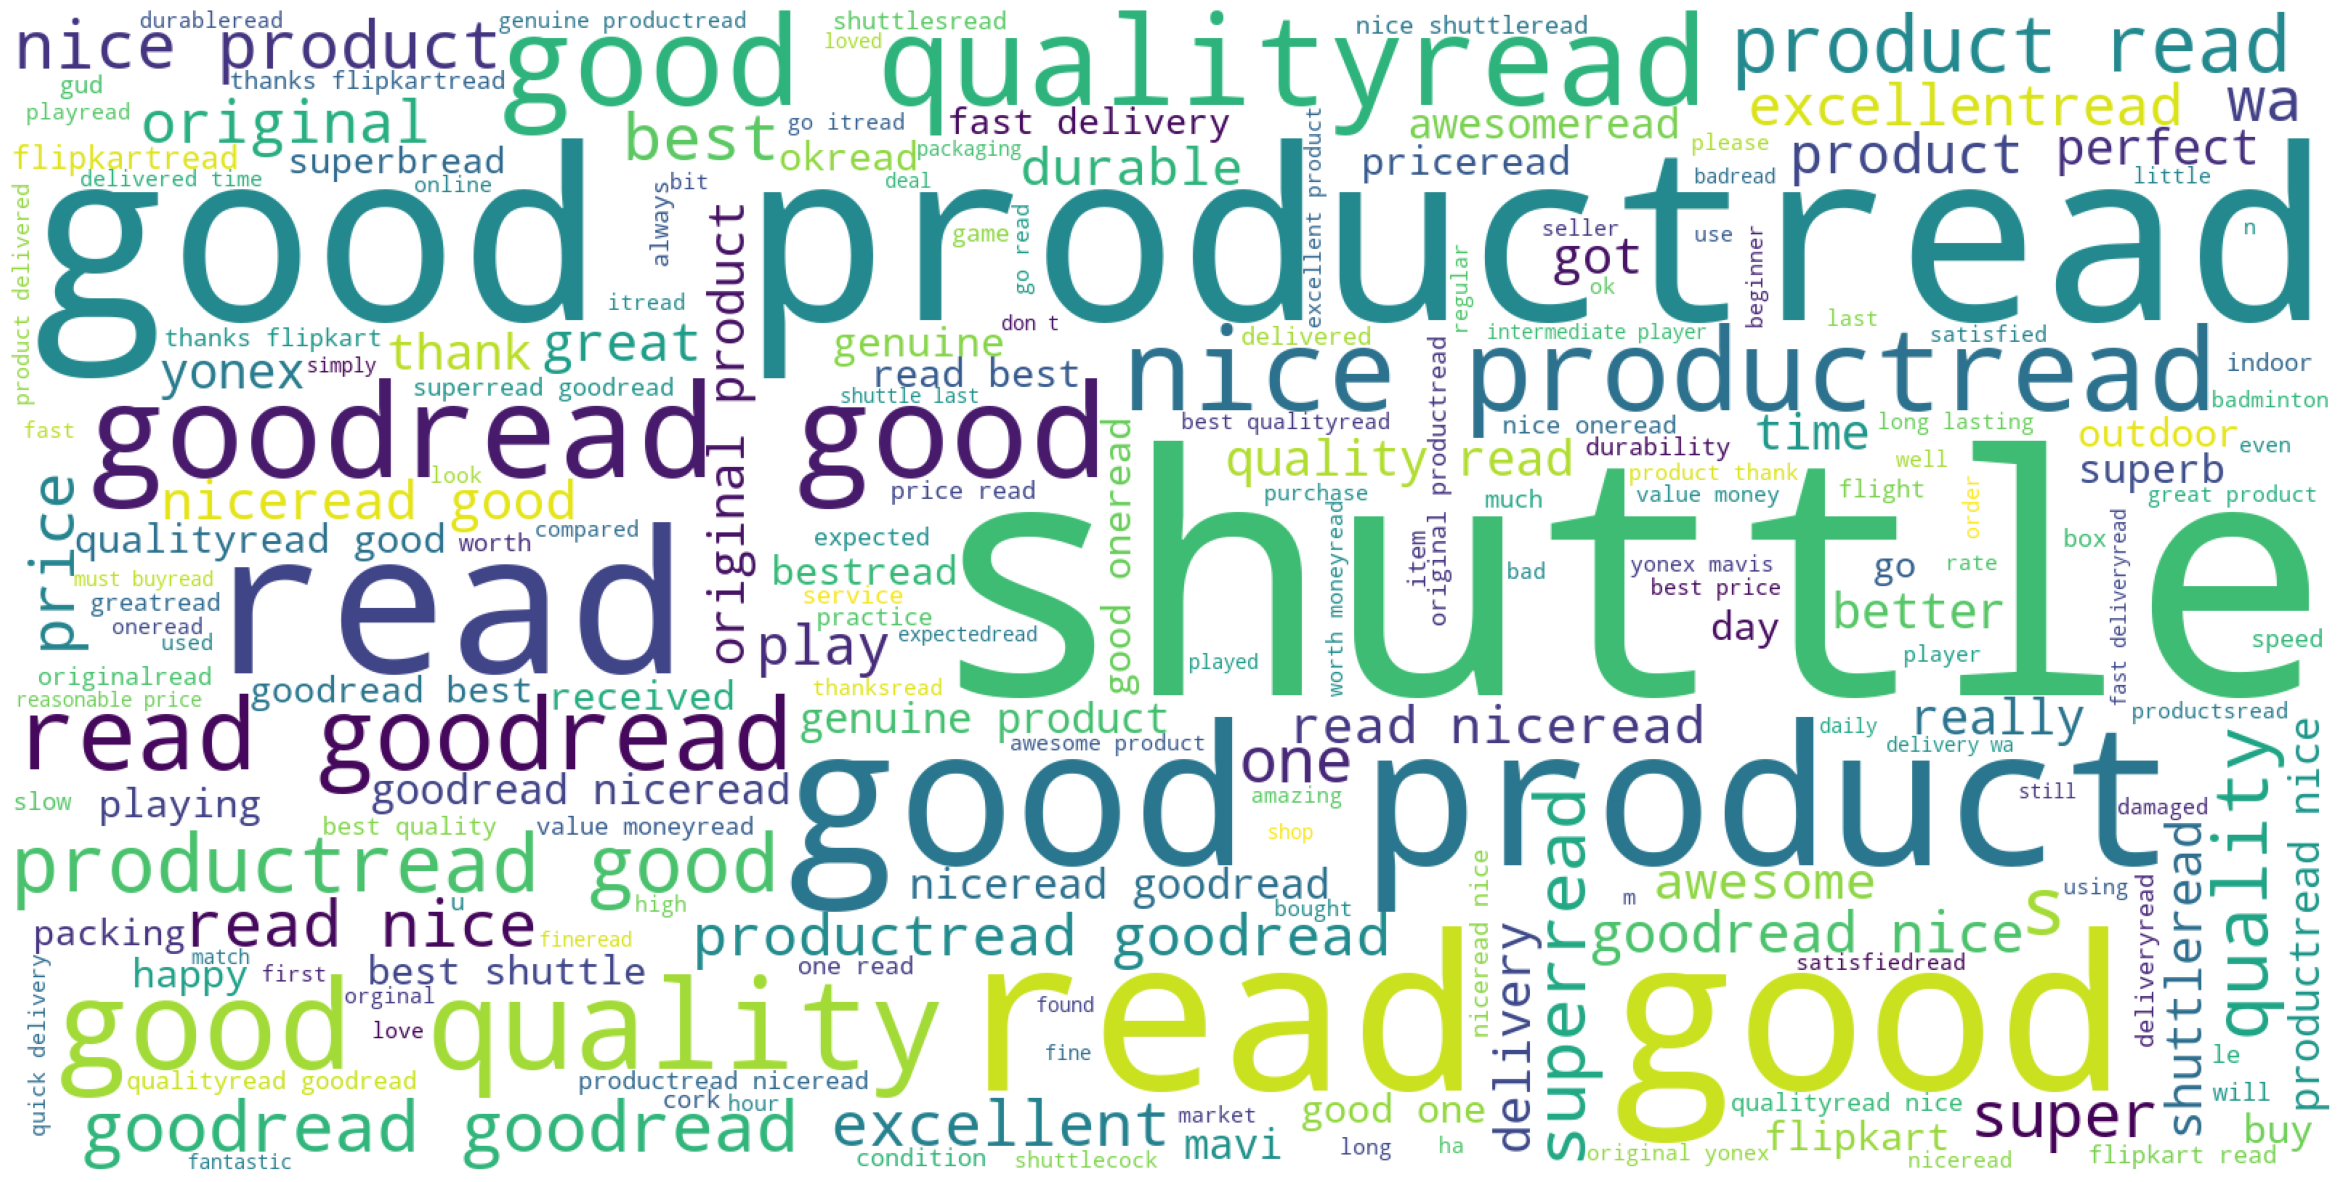

In [40]:
plt.figure(1,figsize=(30,20))
plt.imshow(neutral_wordcloud)
plt.axis('off')
plt.show()

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [42]:
label_encoder = LabelEncoder()  
df['Sentiment']= label_encoder.fit_transform(df['Sentiment']) 
df['Sentiment'].unique() 

C:\Users\Asus\AppData\Local\Temp\ipykernel_10788\2016703510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment']= label_encoder.fit_transform(df['Sentiment'])


array([2, 0, 1])

In [43]:
df

Review text  Ratings  Sentiment  \
0     nice product good quality but price rising bad...        4          2   
1     didn t supplied yonex mavis outside cover wa y...        1          0   
2     worst product damaged shuttlecock packed new b...        1          0   
3     quite o k but nowadays quality cork like not y...        3          1   
4     pricedjust retailer didn t understand wat adva...        1          0   
...                                                 ...      ...        ...   
8503  wrost duplicate productdon t buy seller produc...        1          0   
8504                 received product intact sealedread        5          2   
8505           delivered time but price high marketread        3          1   
8506            mark but available market le price read        4          2   
8507                            nice delivery speedread        5          2   

      polarity  review_len  word_count  
0     0.214286         204          37  
1     0.000000         118          20  
2    -0.137784         157          24  
3     0.273571         388          81  
4     0.500000         114          17  
...        ...         ...         ...  
8503  0.500000         111          17  
8504  0.500000          43           6  
8505  0.330000          60          10  
8506  0.183333          70          14  
8507  0.550000          28           4  

[8508 rows x 6 columns]

In [44]:
tfidf = TfidfVectorizer()

In [45]:
tfidf = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
x = tfidf.fit_transform(df['Review text'])

In [46]:
x.shape

(8508, 5000)

In [47]:
y = df['Sentiment']

In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
from collections import Counter

In [50]:
print(f'Original dataset shape : {Counter(y)}')
smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x, y)
print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({2: 6822, 0: 1071, 1: 615})
Resampled dataset shape Counter({2: 6822, 0: 6822, 1: 6822})


In [51]:
x_train ,x_test , y_train ,y_test = train_test_split(x_res,y_res,test_size=0.25,random_state=43)

In [52]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
y_test_pred = classifier.predict(x_test)

In [54]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

0.7170216923978894
              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1715
           1       0.56      0.87      0.69      1718
           2       0.84      0.53      0.65      1684

    accuracy                           0.72      5117
   macro avg       0.77      0.72      0.72      5117
weighted avg       0.77      0.72      0.72      5117



In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [56]:
 cm = confusion_matrix(y_test, y_test_pred, labels=classifier.classes_)

In [57]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)

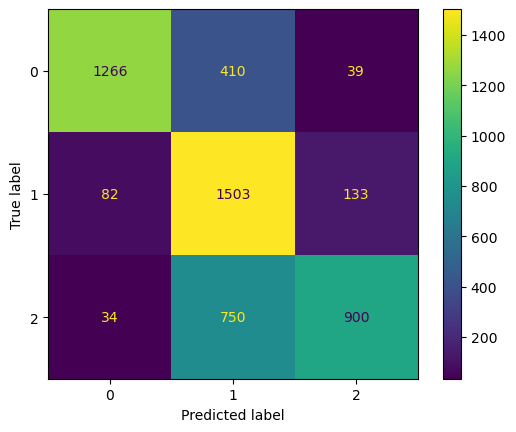

In [58]:
disp.plot()

In [59]:
from sklearn.svm import SVC

In [60]:
clf = SVC()

In [61]:
clf.fit(x_train,y_train)

SVC()

In [69]:
y_test_pred = clf.predict(x_test)

In [70]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

0.7467265976157905
              precision    recall  f1-score   support

           0       0.95      0.70      0.80      1715
           1       0.59      0.91      0.71      1718
           2       0.90      0.63      0.74      1684

    accuracy                           0.75      5117
   macro avg       0.81      0.75      0.75      5117
weighted avg       0.81      0.75      0.75      5117



In [72]:
 import joblib

In [ ]:
joblib.dump(clf, 'svm_model.pkl')